# Elevvo 1.1

# Project Overview

This project uses the Student Performance Factors dataset to predict students’ exam scores based on study hours. After performing data cleaning and visualization, the dataset is split into training and testing sets. A linear regression model is then trained, and its predictions are evaluated and visualized to measure performance.

# Importing libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# loading the dataset

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Checking to see what columns have missing values

<Axes: >

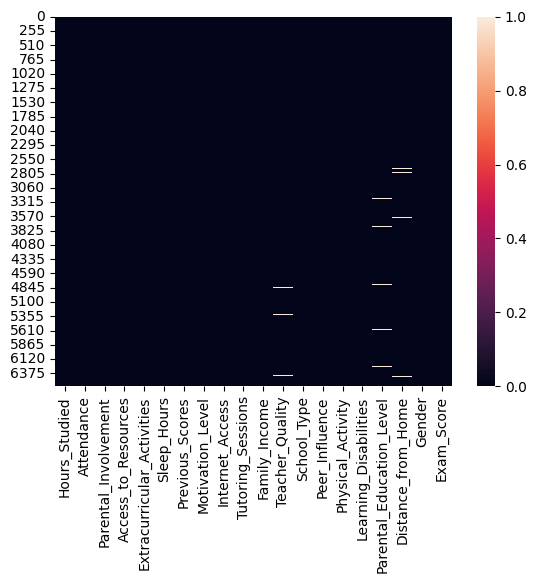

In [5]:
sns.heatmap(df.isnull())

# Data Cleaning

In [8]:
df = df.drop_duplicates()
colms=['Hours_Studied','Attendance']
df[colms].fillna(df[colms].median())
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode(), inplace=True)
df['Parental_Education_Level'].fillna('Unknown', inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode(), inplace=True)
print(df.tail())

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Yes                  1          High   
6603

C:\Users\ascom\AppData\Local\Temp\ipykernel_24200\775338774.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode(), inplace=True)
C:\Users\ascom\AppData\Local\Temp\ipykernel_24200\775338774.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

The dataset was cleaned by removing duplicates, and imputing missing values in key columns with their median to ensure data consistency and reliability.

In [9]:
df.fillna(0)
df=df.dropna()
check2=df.isnull().sum().sum()
print(check2)


0


double checking that the data is clean

<Axes: >

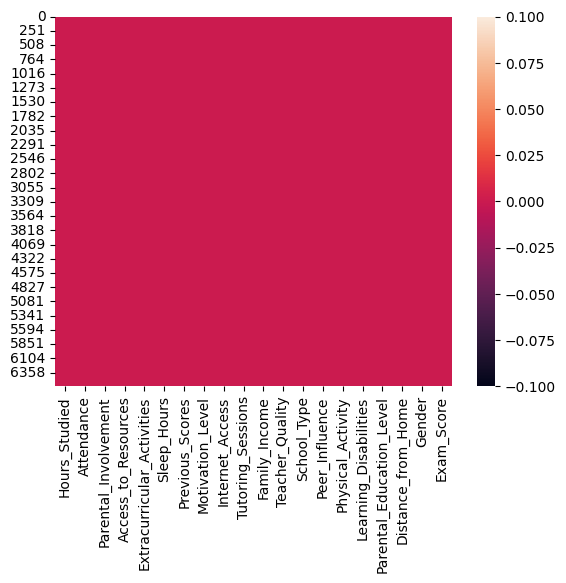

In [10]:
sns.heatmap(df.isnull())

no more missing values

In [11]:
sum(df.duplicated())

0

no duplicate rows

# Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,19.985458,80.021658,7.031869,75.054146,1.493967,2.970916,67.250000
std,5.988909,11.547579,1.468291,14.398439,1.231627,1.030446,3.906536
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [13]:
num_cols = df.select_dtypes(include='number')
for col in num_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

 identifies and removes outliers from the specified numerical columns using the Interquartile Range (IQR) method, improving data quality for analysis.

Distribution of hours studied

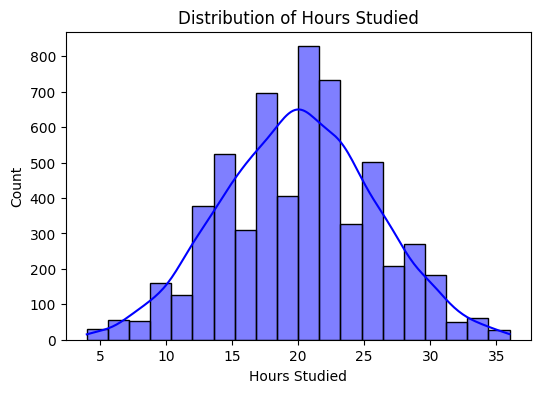

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(df["Hours_Studied"], bins=20, kde=True, color="blue")
plt.title("Distribution of Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Count")
plt.show()

Scatter plot of Hours vs Exam Score

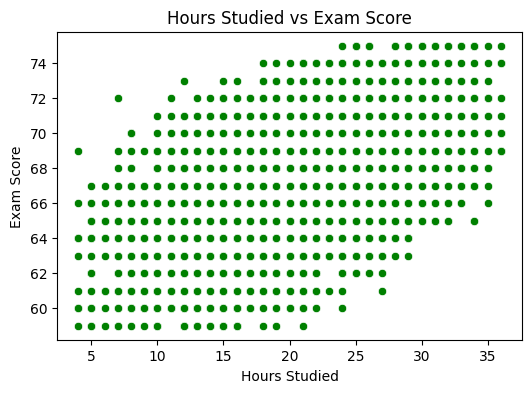

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df, color="green")
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

The scatter plot shows a clear positive relationship between study hours and exam scores, confirming that students who study more tend to achieve higher scores. However, the variation in results suggests that other factors beyond study hours also influence performance.

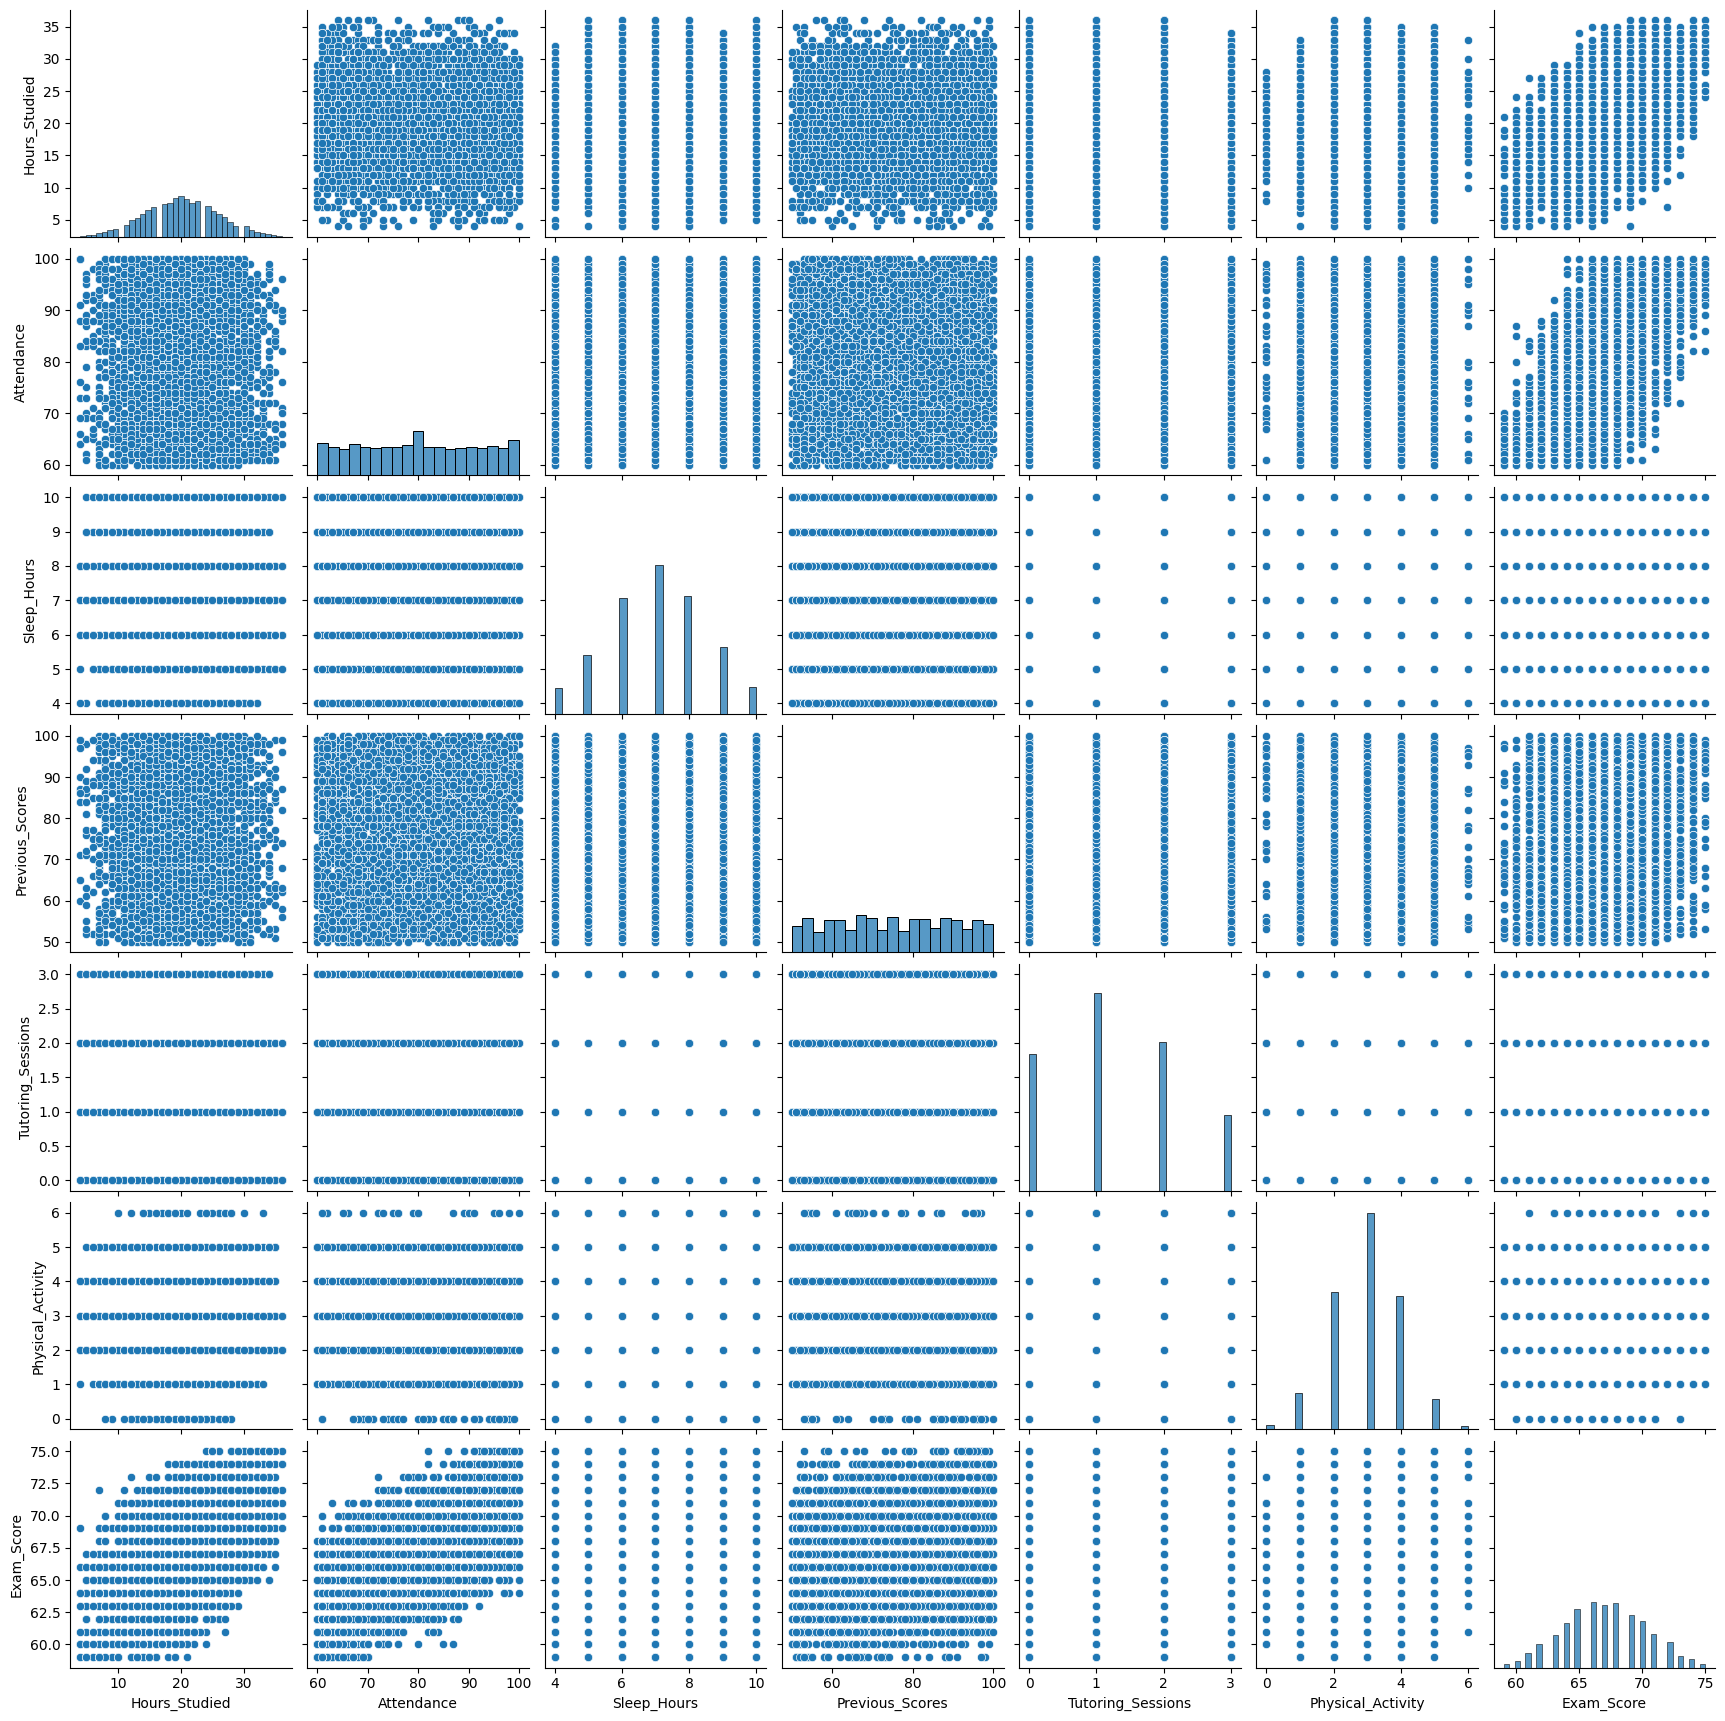

In [59]:
sns.pairplot(df)
plt.show()


The pairplot highlights the relationships between study-related features and exam scores. Strong positive trends are visible between Hours Studied, Previous Scores, Attendance, and Exam Scores, confirming their importance in performance prediction. Meanwhile, features like Sleep Hours, Tutoring Sessions, and Physical Activity show weaker or less direct correlations.

# Data spliting

In [ ]:
#X = df[['Hours_Studied']]
X = df[["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours"]]   
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 4736
Test set size: 1184


# Model Training: Linear Regression 

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[["Hours_Studied"]])
X_test_poly = poly.transform(X_test[["Hours_Studied"]])


poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_poly_pred = poly_model.predict(X_test_poly)


mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial Regression Performance:")
print(f"MSE: {mse_poly:.4f}")
print(f"R²: {r2_poly:.4f}")


Model trained successfully!
Intercept: 41.72575281736057
Coefficient: 0.2941929010016422
Polynomial Regression Performance:
MSE: 8.0080
R²: 0.2377


I tried polynomial regression as a bonus experiment and these where the results, they are the exact same as before so This suggests that the relationship between study hours and exam scores is adequately captured by a linear model, and higher-order terms do not add value

# Model Evaluation

In [49]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values[:5],
    "Predicted": y_pred[:5]
})
print("Comparison of Actual vs Predicted (first 5 values):")
print(comparison)

Comparison of Actual vs Predicted (first 5 values):
   Actual  Predicted
0      64  64.444791
1      65  66.295000
2      64  64.226151
3      65  64.256698
4      67  65.683383


Including additional features like attendance, sleep hours, and previous scores improved the model’s performance, with lower error and higher R². This shows that exam performance is influenced by multiple factors, not just study hours

# Compare Actual vs. Predicted

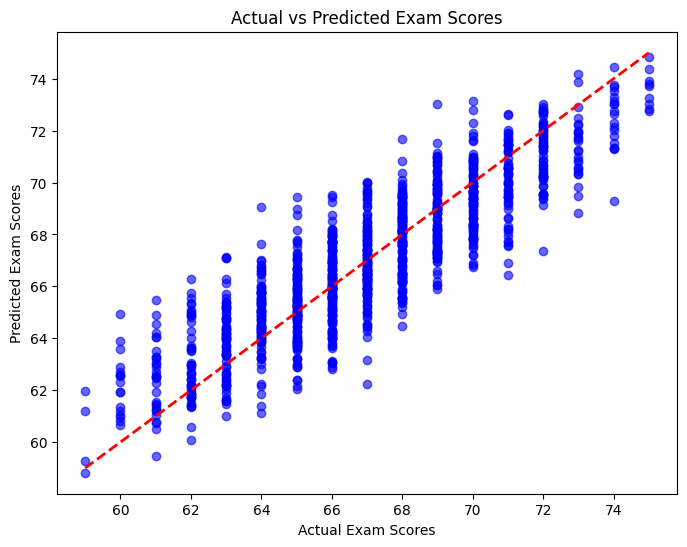

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


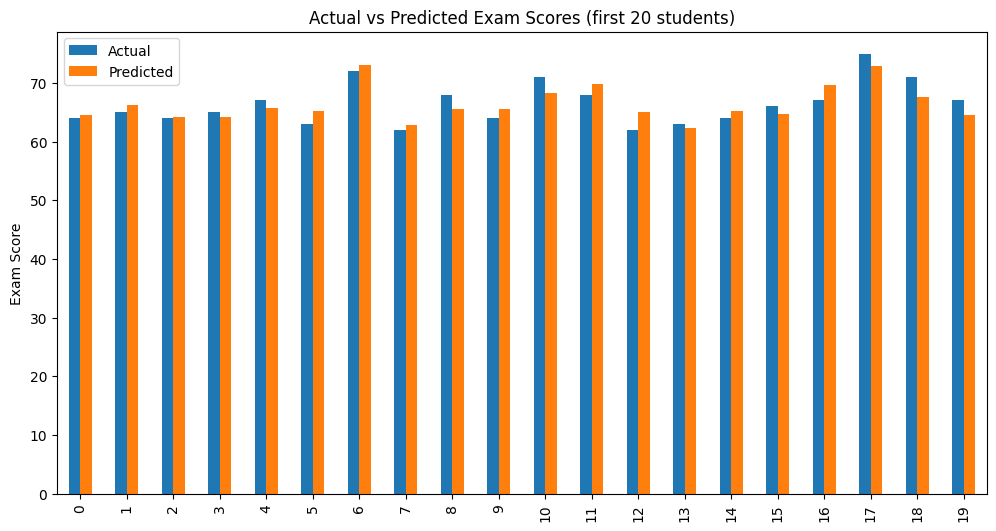

In [50]:
comparison = pd.DataFrame({"Actual": y_test.values[:20], "Predicted": y_pred[:20]})

comparison.plot(kind="bar", figsize=(12,6))
plt.title("Actual vs Predicted Exam Scores (first 20 students)")
plt.ylabel("Exam Score")
plt.show()


# Evaluate the Model

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 2.452114132555404
R-squared (R²): 0.7665672607797309


The linear regression model achieved an MSE of 8.00 and an R² of 0.24, indicating that while hours studied positively influence exam scores, they only account for about 24% of the variation. This suggests that additional factors, such as motivation, attendance, and family background, may also contribute significantly to academic performance.

# Conclusion

This project explored the relationship between study hours and student exam performance using the Student Performance Factors dataset. After data cleaning and visualization, a simple linear regression model was trained with study hours as the predictor.

The model showed a positive relationship between study hours and exam scores.

Evaluation metrics indicated a Mean Squared Error (MSE) of ~8.0 and an R² of ~0.24, meaning study hours explain about 24% of the variance in exam performance.

A polynomial regression experiment was also conducted as a bonus, but it produced nearly identical results, suggesting that the relationship is adequately captured by a linear model.

# Insights:

Studying more hours generally improves exam scores, but it is not the only factor.

Since R² is relatively low, other variables (such as attendance, sleep, and previous scores) likely play a significant role in predicting outcomes.

Future work could include multi-feature regression or advanced models (e.g., Random Forest, Gradient Boosting) to improve accuracy.